In [1]:
# 자동차 연비 데이터 로드 및 기본 구조 파악
import pandas as pd

mpg_df = pd.read_csv('auto-mpg.csv')
print('--- 데이터프레임 info ---')
mpg_df.info()
print('\n--- 데이터프레임 상위 5개 ---')
print(mpg_df.head())
print('\n--- 기초 통계 ---')
print(mpg_df.describe(include='all'))

--- 데이터프레임 info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB

--- 데이터프레임 상위 5개 ---
    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          

In [2]:
# 결측치 및 이상치 처리 후 기본 통계량 분석
import numpy as np

# 결측치 처리: '?'를 np.nan으로 변환 후, 숫자형으로 변환
mpg_df = mpg_df.replace('?', np.nan)
for col in ['horsepower']:
    mpg_df[col] = pd.to_numeric(mpg_df[col], errors='coerce')

# 결측치 개수 확인 및 제거
print('각 컬럼별 결측치 수:')
print(mpg_df.isnull().sum())
mpg_df_clean = mpg_df.dropna()

# 이상치 처리: IQR 방식 (mpg, horsepower 등 주요 수치형 변수)
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

for col in ['mpg', 'horsepower', 'weight', 'acceleration']:
    mpg_df_clean = remove_outliers(mpg_df_clean, col)

# 처리 후 데이터 기본 통계량
print('\n--- 결측치 및 이상치 처리 후 기초 통계 ---')
print(mpg_df_clean.describe(include='all'))

각 컬럼별 결측치 수:
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

--- 결측치 및 이상치 처리 후 기초 통계 ---
               mpg   cylinders  displacement  horsepower       weight  \
count   373.000000  373.000000    373.000000  373.000000   373.000000   
unique         NaN         NaN           NaN         NaN          NaN   
top            NaN         NaN           NaN         NaN          NaN   
freq           NaN         NaN           NaN         NaN          NaN   
mean     23.640214    5.407507    188.754692  101.841823  2944.919571   
std       7.626037    1.672082     98.649235   33.624095   828.340077   
min       9.000000    3.000000     68.000000   46.000000  1613.000000   
25%      17.600000    4.000000    105.000000   76.000000  2220.000000   
50%      23.000000    4.000000    146.000000   92.000000  2774.000000   
75%      29.000000    6.000000    258.000000  120.00

상관계수 행렬:
                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.771247     -0.805049   -0.790232 -0.832193   
cylinders    -0.771247   1.000000      0.955926    0.857821  0.896378   
displacement -0.805049   0.955926      1.000000    0.888220  0.938802   
horsepower   -0.790232   0.857821      0.888220    1.000000  0.881265   
weight       -0.832193   0.896378      0.938802    0.881265  1.000000   
acceleration  0.367520  -0.475904     -0.489583   -0.648925 -0.376125   
model year    0.551928  -0.304672     -0.315273   -0.354412 -0.268195   
origin        0.562451  -0.562229     -0.622439   -0.464425 -0.585417   

              acceleration  model year    origin  
mpg               0.367520    0.551928  0.562451  
cylinders        -0.475904   -0.304672 -0.562229  
displacement     -0.489583   -0.315273 -0.622439  
horsepower       -0.648925   -0.354412 -0.464425  
weight           -0.376125   -0.268195 -0.585417  
acceleration      1.000000 

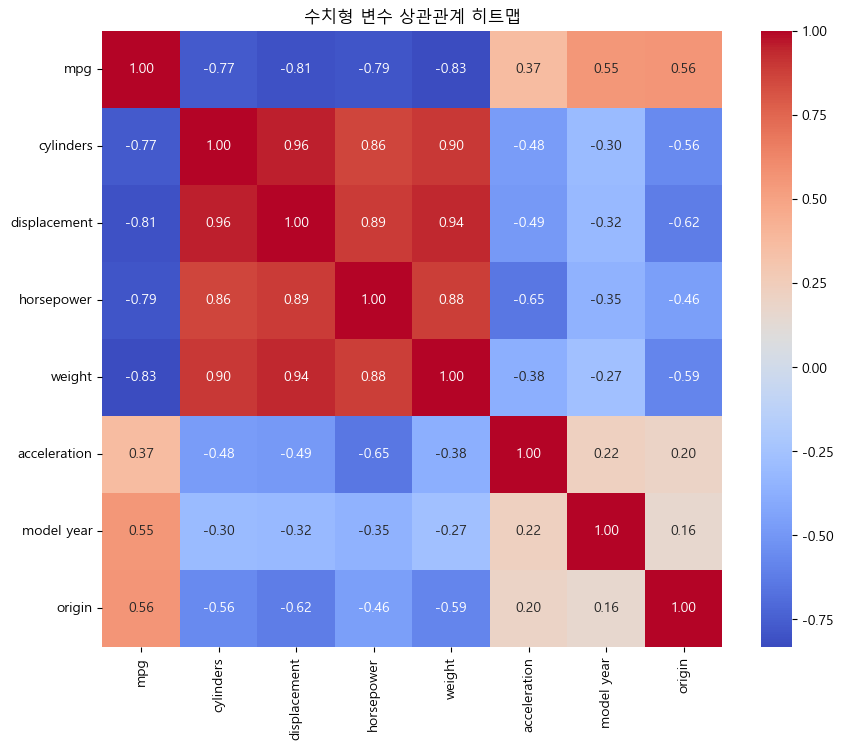

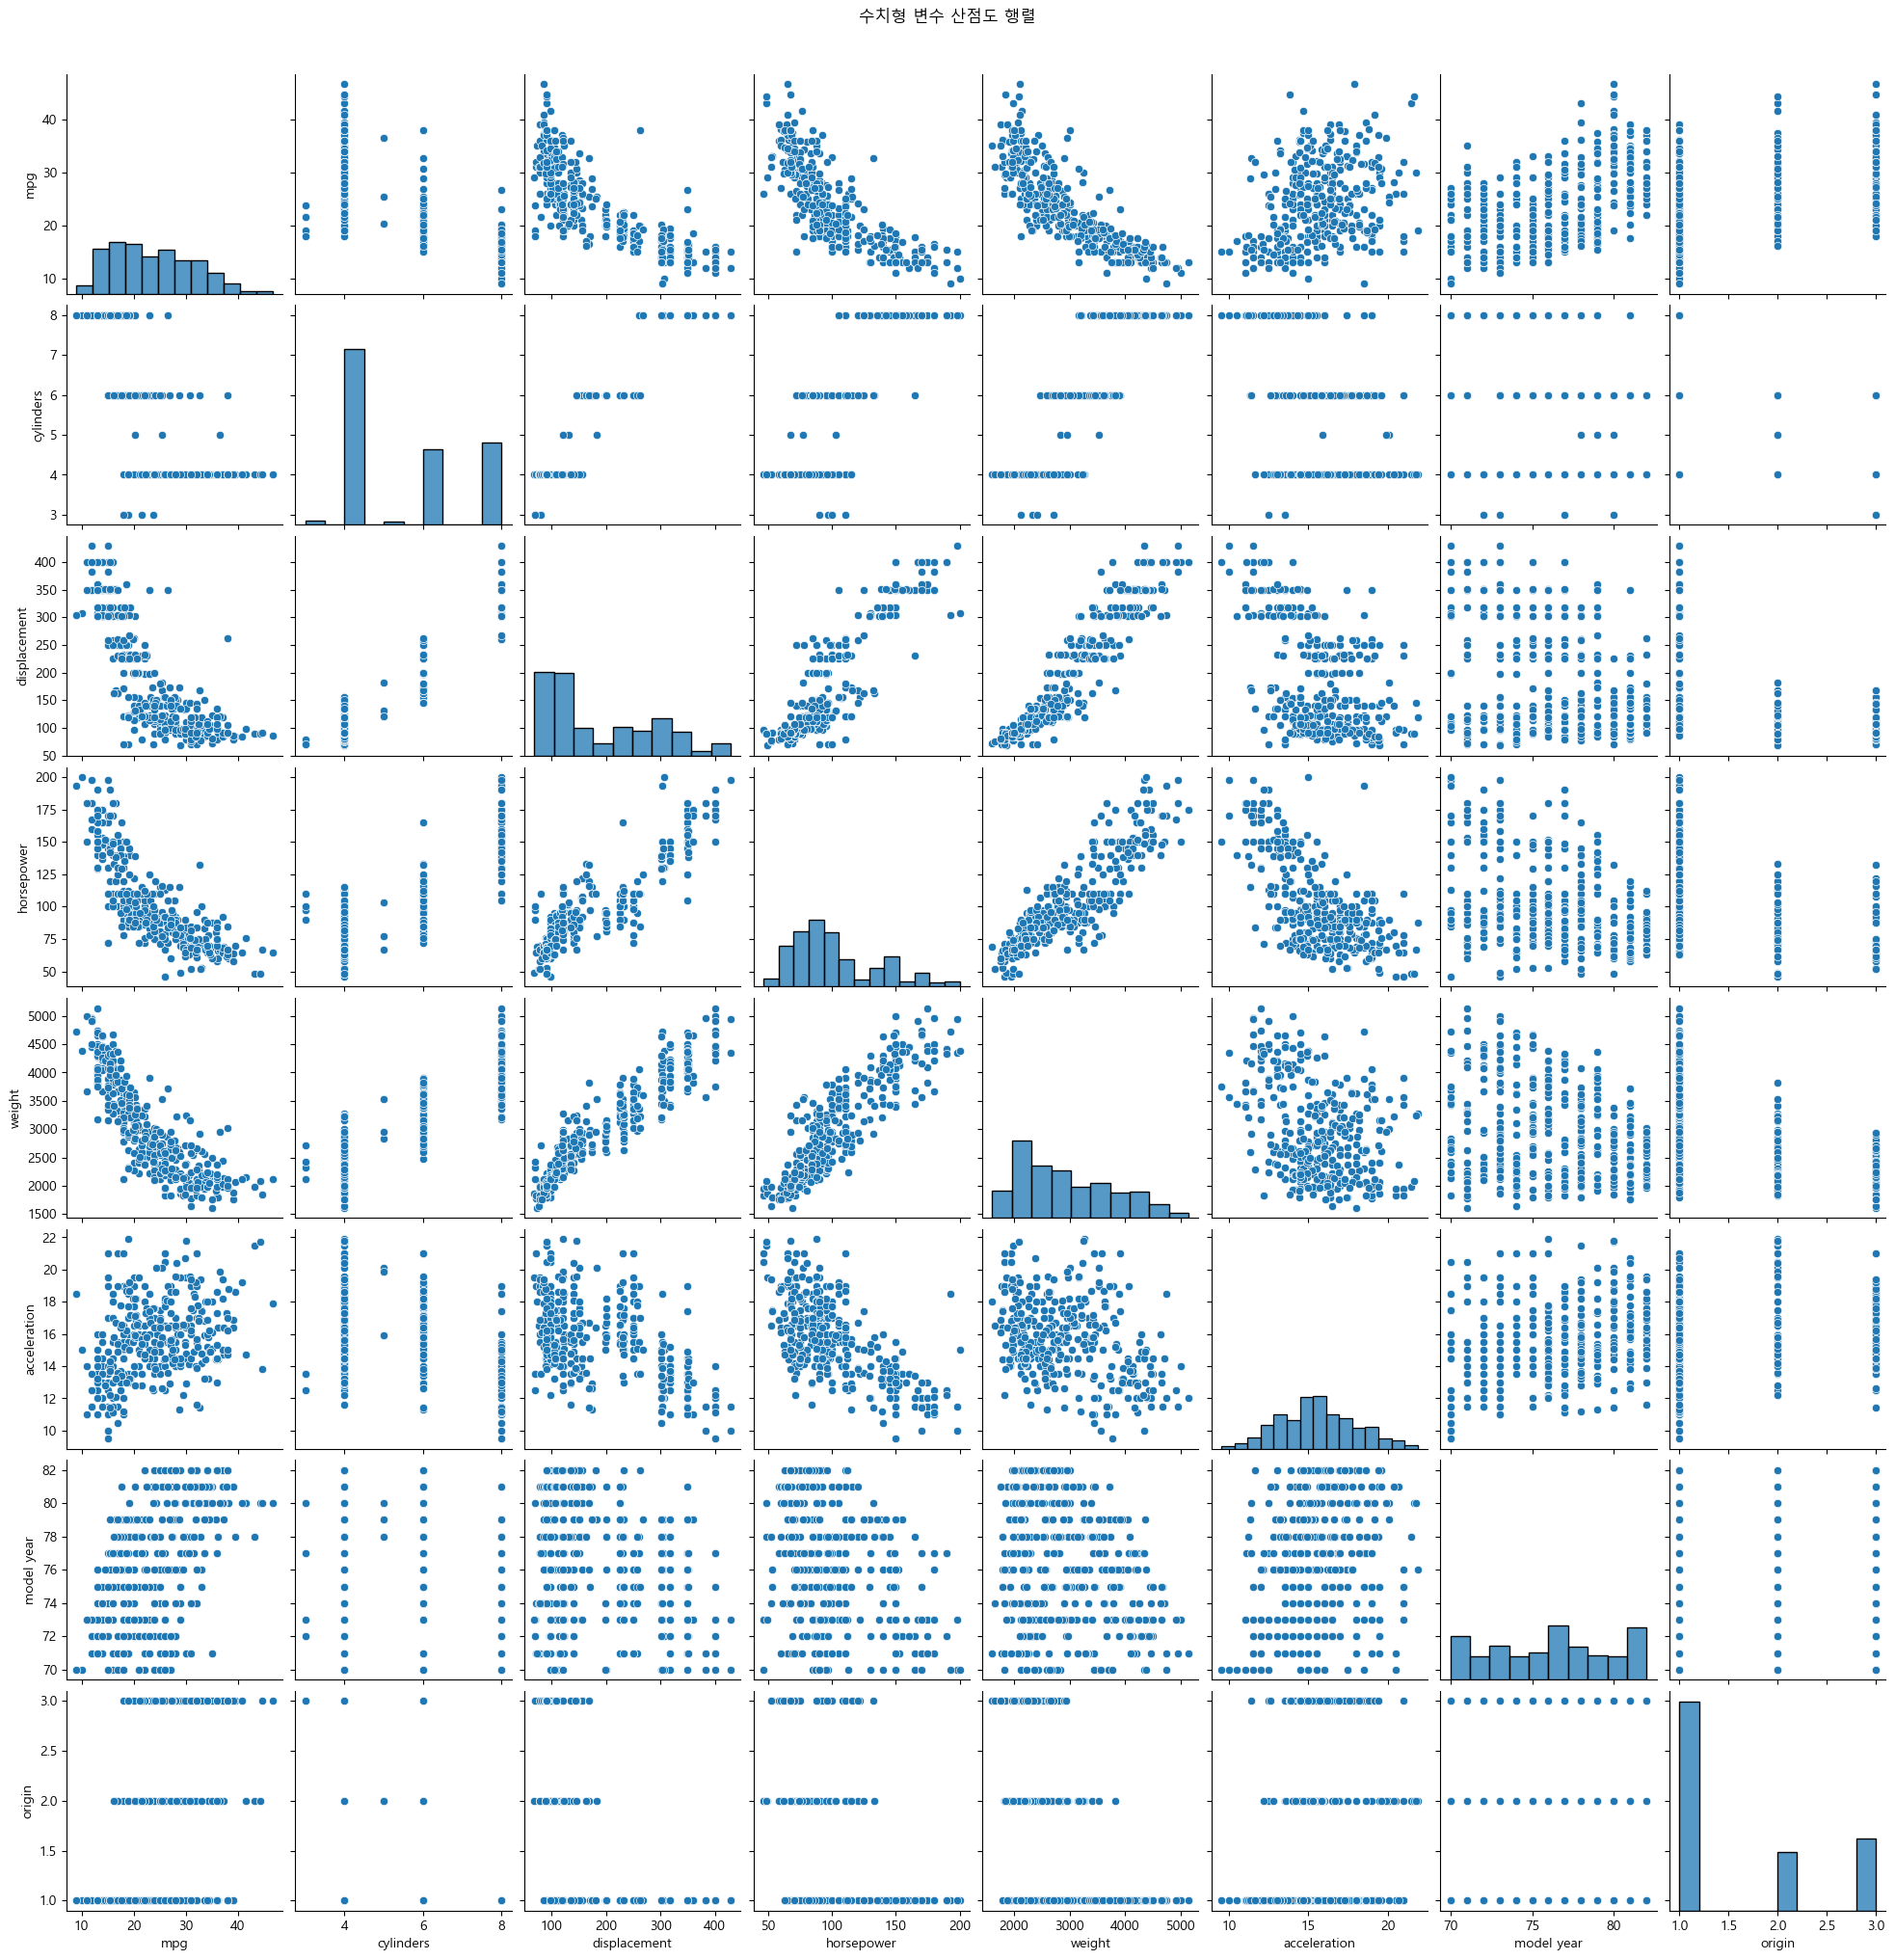

In [4]:
# 변수들 간의 상관관계 분석 및 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# 한글 폰트 설정 (Windows: Malgun Gothic, Arial 등)
mpl.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 수치형 변수만 선택
num_cols = mpg_df_clean.select_dtypes(include=[np.number]).columns.tolist()

# 상관계수 행렬
corr = mpg_df_clean[num_cols].corr()
print('상관계수 행렬:')
print(corr)

# 히트맵 시각화
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('수치형 변수 상관관계 히트맵')
plt.show()

# 산점도 행렬 시각화
sns.pairplot(mpg_df_clean[num_cols])
plt.suptitle('수치형 변수 산점도 행렬', y=1.02)
plt.show()

회귀계수(기울기): -0.0077
절편: 46.2027
MSE(평균제곱오차): 17.8326
R^2(설명력): 0.6925


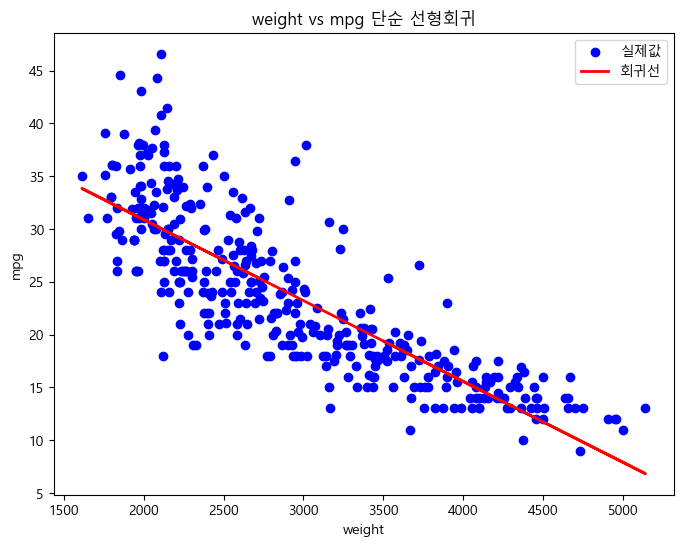

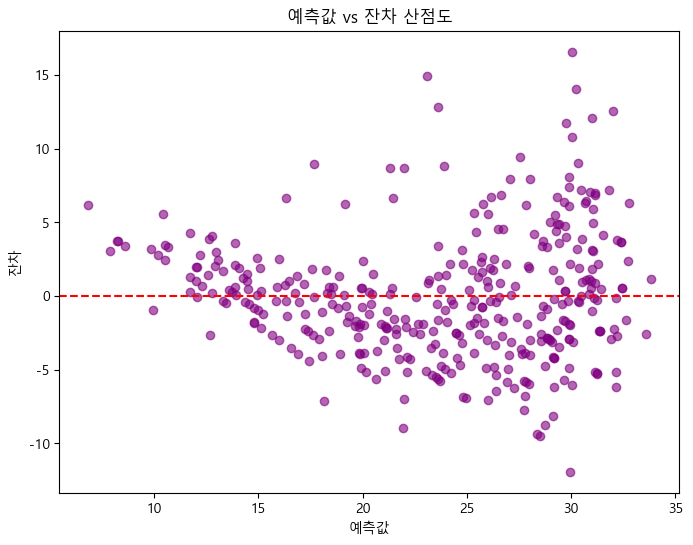

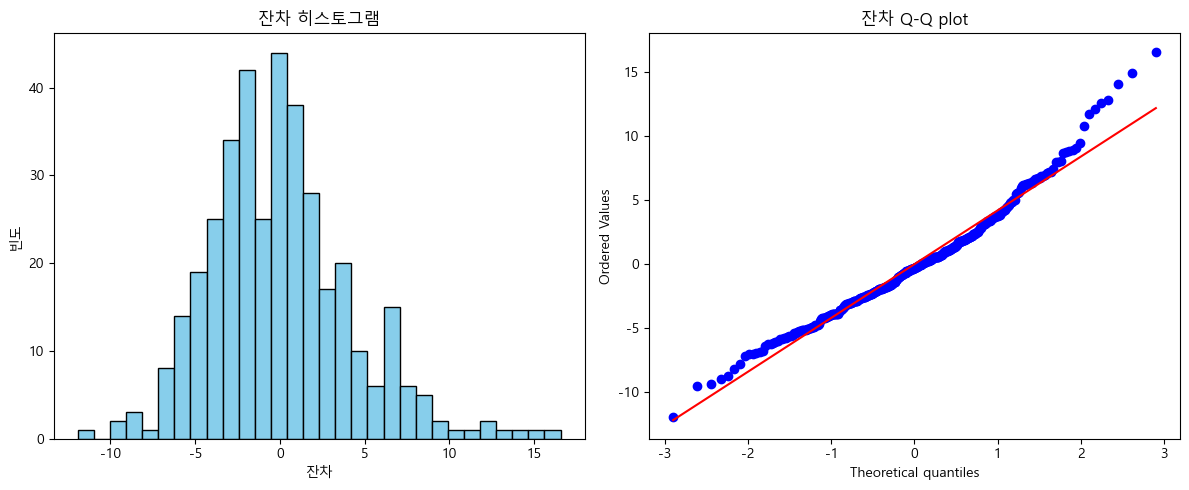

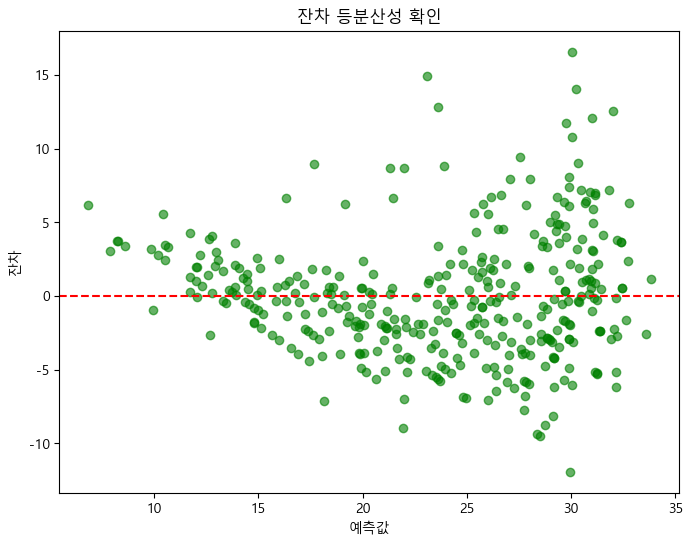

In [6]:
# weight를 독립변수, mpg를 종속변수로 하는 단순 선형 회귀모델 구축 및 평가
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 준비
X = mpg_df_clean[['weight']]
y = mpg_df_clean['mpg']

# 모델 학습
model = LinearRegression()
model.fit(X, y)

# 예측
y_pred = model.predict(X)

# 회귀계수 및 절편 출력
print(f'회귀계수(기울기): {model.coef_[0]:.4f}')
print(f'절편: {model.intercept_:.4f}')

# 평가 지표 출력
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f'MSE(평균제곱오차): {mse:.4f}')
print(f'R^2(설명력): {r2:.4f}')

# 산점도 및 회귀선 시각화
plt.figure(figsize=(8,6))
plt.scatter(X, y, color='blue', label='실제값')
plt.plot(X, y_pred, color='red', linewidth=2, label='회귀선')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.title('weight vs mpg 단순 선형회귀')
plt.legend()
plt.show()

# --- 잔차 분석 ---
# 잔차(residual) 계산
residuals = y - y_pred

# 1. 잔차 산점도 (예측값 vs 잔차)
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, color='purple', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('예측값')
plt.ylabel('잔차')
plt.title('예측값 vs 잔차 산점도')
plt.show()

# 2. 잔차의 정규성 확인 (히스토그램 & Q-Q plot)
import scipy.stats as stats
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(residuals, bins=30, color='skyblue', edgecolor='k')
plt.title('잔차 히스토그램')
plt.xlabel('잔차')
plt.ylabel('빈도')
plt.subplot(1,2,2)
stats.probplot(residuals, dist='norm', plot=plt)
plt.title('잔차 Q-Q plot')
plt.tight_layout()
plt.show()

# 3. 잔차의 등분산성 확인 (예측값 vs 잔차)
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, color='green', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('예측값')
plt.ylabel('잔차')
plt.title('잔차 등분산성 확인')
plt.show()

[다항회귀] MSE: 16.4461, R^2: 0.7164
[단순회귀] MSE: 17.8326, R^2: 0.6925


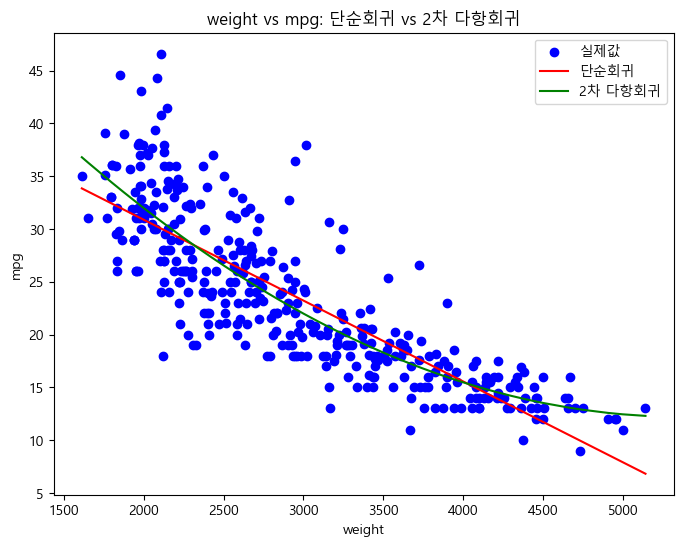

In [8]:
# 2차항을 포함한 다항 회귀모델 구축 및 단순회귀와 성능 비교
from sklearn.preprocessing import PolynomialFeatures

# 다항 특성 생성 (2차항)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(mpg_df_clean[['weight']])

# 다항 회귀 모델 학습
model_poly = LinearRegression()
model_poly.fit(X_poly, y)

# 예측
y_pred_poly = model_poly.predict(X_poly)

# 평가 지표
mse_poly = mean_squared_error(y, y_pred_poly)
r2_poly = r2_score(y, y_pred_poly)
print(f'[다항회귀] MSE: {mse_poly:.4f}, R^2: {r2_poly:.4f}')

# 단순회귀와 비교
print(f'[단순회귀] MSE: {mean_squared_error(y, model.predict(X)):.4f}, R^2: {r2_score(y, model.predict(X)):.4f}')

# 시각화
plt.figure(figsize=(8,6))
plt.scatter(X, y, color='blue', label='실제값')
# weight 정렬 후 예측곡선 그리기
weight_sorted = np.sort(X.values.flatten())
weight_sorted_df = pd.DataFrame({'weight': weight_sorted})
y_pred_simple = model.predict(weight_sorted_df)
y_pred_poly_sorted = model_poly.predict(poly.transform(weight_sorted_df))
plt.plot(weight_sorted, y_pred_simple, color='red', label='단순회귀')
plt.plot(weight_sorted, y_pred_poly_sorted, color='green', label='2차 다항회귀')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.title('weight vs mpg: 단순회귀 vs 2차 다항회귀')
plt.legend()
plt.show()

In [10]:
# 여러 독립변수(cylinders, horsepower, weight)를 사용한 다중 회귀모델 구축 및 평가
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 준비
X_multi = mpg_df_clean[['cylinders', 'horsepower', 'weight']]
y_multi = mpg_df_clean['mpg']

# 모델 학습
model_multi = LinearRegression()
model_multi.fit(X_multi, y_multi)

# 예측
y_pred_multi = model_multi.predict(X_multi)

# 회귀계수 및 절편 출력
print('회귀계수:', dict(zip(X_multi.columns, model_multi.coef_)))
print(f'절편: {model_multi.intercept_:.4f}')

# 평가 지표 출력
mse_multi = mean_squared_error(y_multi, y_pred_multi)
r2_multi = r2_score(y_multi, y_pred_multi)
print(f'MSE(평균제곱오차): {mse_multi:.4f}')
print(f'R^2(설명력): {r2_multi:.4f}')

회귀계수: {'cylinders': np.float64(-0.20778820251202926), 'horsepower': np.float64(-0.05458328128163627), 'weight': np.float64(-0.0053329517276966346)}
절편: 46.0278
MSE(평균제곱오차): 16.9722
R^2(설명력): 0.7074


In [ ]:
# 다양한 차수의 다항 회귀모델 비교 및 과적합 분석, 최적 차수 선택
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# 데이터 분할 (학습/테스트)
X = mpg_df_clean[['weight']]
y = mpg_df_clean['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_scores = []
test_scores = []
degrees = range(1, 8)  # 1~7차 다항식

for d in degrees:
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_scores.append(train_r2)
    test_scores.append(test_r2)
    print(f'{d}차 다항식 - 학습 R^2: {train_r2:.4f}, 테스트 R^2: {test_r2:.4f}')

# 차수별 R^2 시각화
plt.figure(figsize=(8,6))
plt.plot(degrees, train_scores, marker='o', label='학습 R^2')
plt.plot(degrees, test_scores, marker='s', label='테스트 R^2')
plt.xlabel('다항식 차수')
plt.ylabel('R^2')
plt.title('다항식 차수별 학습/테스트 R^2')
plt.legend()
plt.xticks(degrees)
plt.show()

# 최적 차수 선택 (테스트 R^2 최대값)
best_degree = degrees[test_scores.index(max(test_scores))]
print(f'최적의 다항식 차수: {best_degree} (테스트 R^2={max(test_scores):.4f})')